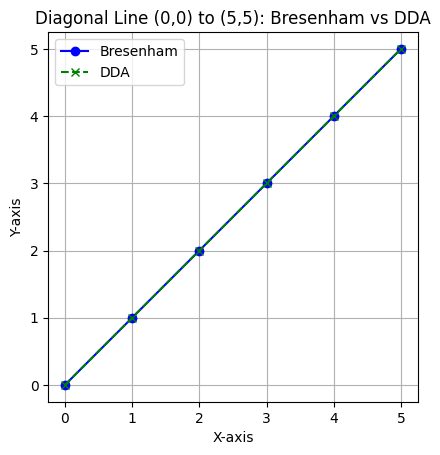

Bresenham pixel count: 6
Bresenham pixels     : [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]
DDA pixel count      : 6
DDA pixels           : [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]


In [19]:
import matplotlib.pyplot as plt

def bresenham_line(x1, y1, x2, y2):
    points = []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    x, y = x1, y1

    sx = 1 if x2 >= x1 else -1
    sy = 1 if y2 >= y1 else -1

    if dx > dy:
        d = 2 * dy - dx
        for _ in range(dx + 1):
            points.append((x, y))
            if d >= 0:
                y += sy
                d -= 2 * dx
            x += sx
            d += 2 * dy
    else:
        d = 2 * dx - dy
        for _ in range(dy + 1):
            points.append((x, y))
            if d >= 0:
                x += sx
                d -= 2 * dy
            y += sy
            d += 2 * dx
    return points


def dda_line(x1, y1, x2, y2):
    points = []
    dx = x2 - x1
    dy = y2 - y1

    steps = int(max(abs(dx), abs(dy)))
    x_inc = dx / steps
    y_inc = dy / steps

    x, y = x1, y1
    for _ in range(steps + 1):
        points.append((round(x), round(y)))
        x += x_inc
        y += y_inc
    return points


def compare_diagonal_lines():
    x1, y1 = 0, 0
    x2, y2 = 5, 5

    bresenham_pts = bresenham_line(x1, y1, x2, y2)
    dda_pts = dda_line(x1, y1, x2, y2)


    bx, by = zip(*bresenham_pts)
    dx, dy = zip(*dda_pts)


    plt.plot(bx, by, 'bo-', label='Bresenham', markersize=6)
    plt.plot(dx, dy, 'gx--', label='DDA', markersize=6)

    plt.title("Diagonal Line (0,0) to (5,5): Bresenham vs DDA")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()


    print("Bresenham pixel count:", len(bresenham_pts))
    print("Bresenham pixels     :", bresenham_pts)
    print("DDA pixel count      :", len(dda_pts))
    print("DDA pixels           :", dda_pts)

if __name__ == "__main__":
    compare_diagonal_lines()
